# Heart Disease Prediction 

In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [2]:
values = pd.read_csv("values.csv")

In [3]:
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
labels = pd.read_csv("labels.csv")

In [5]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
## Performing outer join to merge the target variable present in different file on patient id
data = pd.merge(values,labels[['patient_id','heart_disease_present']],on='patient_id',how='outer',indicator=False)

In [7]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
## Saving the data in my local repository
data.to_csv("Data.csv" , index=False)

In [9]:
## now a file name data.csv is saved in my repository where my present working directory 

In [10]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [11]:
## Data Analysis 

In [12]:
data.info() # to determine the 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

We can observe from the data that there are no null values 

1) We have patient ID and thal that are object type , as patient ID are unique , we will be dropping that column in the further and will have to encode thal for machine to undertand the importance of that column

2) There is one float value 

3) There are 12 columns with integer data type

In [13]:
data.shape

(180, 15)

In [14]:
# the data has 180 rows and 15 columns 

In [15]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [16]:
data.keys()

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [17]:
data.dtypes.value_counts()

int64      12
object      2
float64     1
dtype: int64

In [18]:
# 12 integer data type 1 float and 2 object data type

In [19]:
## lets drop the patient id column as all values are unique
data.drop('patient_id' , axis=1, inplace=True)

## Data Cleaning

In [20]:
## lets check the no of null values
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [21]:
## we have a perfect non-null data 

## Data Visualization

##### Univarient Analysis

In [140]:
!pip install sweetviz

In [141]:
import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1) We can observe that type 1 is the most common in slop_of_peak_exercise_st_segment and it has 3 segment values 1,2,3 and no missing values

2) We can observe that type 1 is the most common in thal and more than 50% people express the result as type 1 in thal

3) The majarity of resting_blood_pressure lies between 120-140

4) We can observe that chest_pain_type 4 is the most common chest_type recorded in sample data

5) Fasting blood sugar leel for 120mg/dl records 80 of the data as 0

6) Serum cholestrol mg/dl has an aveage values of 250mg/dl

7) We can observe that from the survey conducted , the heart disease not being present has an average percentage of 55% and heart disease present is 45%

##### Bivarient Analysis

In [22]:
# lets visualize the plots 
#categorical columns are
cat_cols = data[['thal','sex','chest_pain_type','num_major_vessels','resting_ekg_results','slope_of_peak_exercise_st_segment','exercise_induced_angina']]
num_cols = data[['resting_blood_pressure','fasting_blood_sugar_gt_120_mg_per_dl','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']]

In [23]:
cat_cols

,thal,sex,chest_pain_type,num_major_vessels,resting_ekg_results,slope_of_peak_exercise_st_segment,exercise_induced_angina
0,normal,1,2,0,2,1,0
1,normal,0,3,0,0,2,0
2,normal,1,4,3,2,1,1
3,reversible_defect,1,4,0,0,1,0
4,reversible_defect,1,1,0,2,3,0
...,...,...,...,...,...,...,...
175,reversible_defect,1,4,2,0,2,0
176,normal,0,4,0,1,2,1
177,reversible_defect,1,3,0,0,2,1
178,normal,1,3,2,0,1,0


In [24]:
cat_cols['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

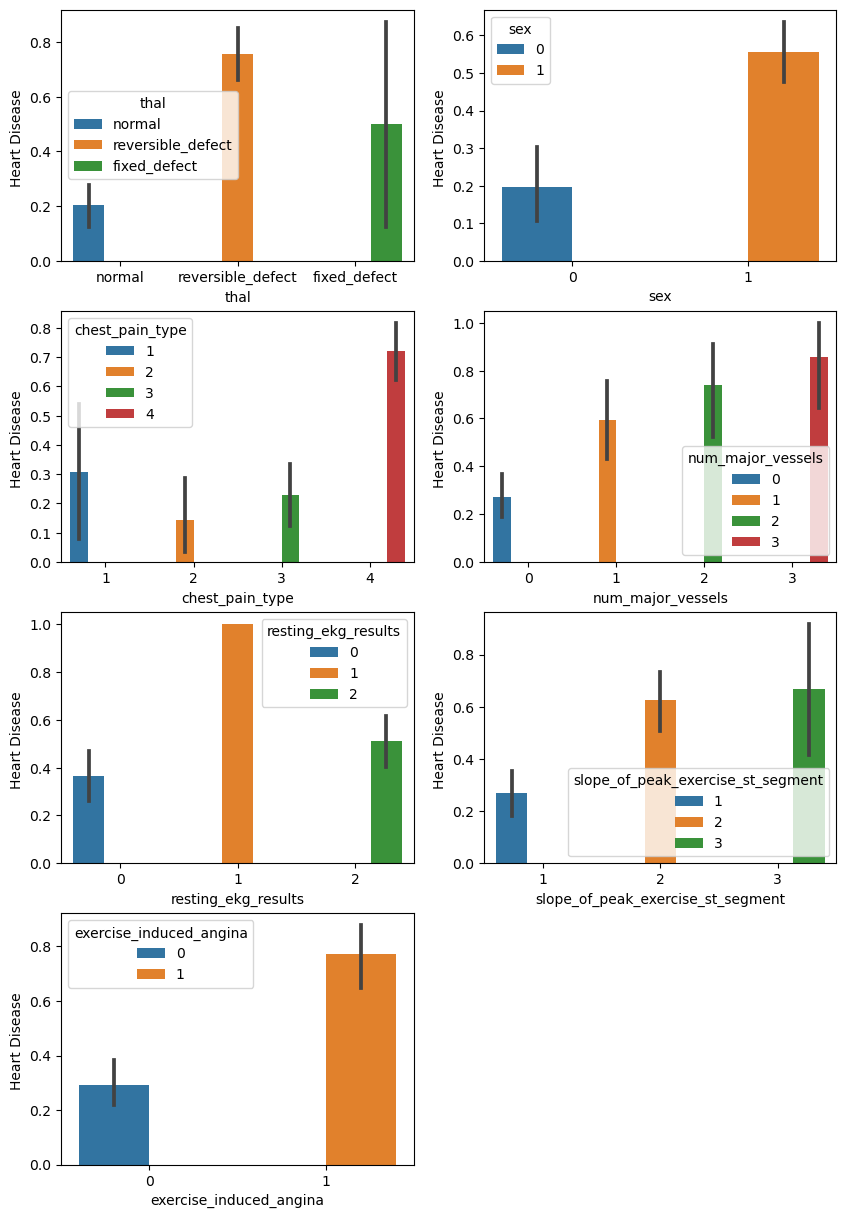

In [25]:
fig = plt.figure(figsize=(10,15))
plotnumber=1
for column in cat_cols:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.barplot(x=column , y='heart_disease_present' , data=data[[column,'heart_disease_present']] , ax=ax , hue=column)
        plt.xlabel(column)
        plt.ylabel('Heart Disease ')
    plotnumber+=1
plt.show()
    

1) From data we can analyse that the results of thallium stress test(thal) , has the max result for reversible_defect

2) We can see that 1-Male are more prone to heart disease than 0_Female

3) The chest_pain_type 4 is the most common type of chest pain . We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

4) Most of the people has 3 major vessels 

5) We realize that people with resting_ekg '1'are much more likely to have a heart disease than with  resting_ekg '0' & '2'

6) People with slope of peak exercise = '2' & '3' are more likely to have heart problems 

7) People with exercise_inducted_angina= 0 are much less likely to have heart problems

In [26]:
## Numerical columns plot

In [27]:
num_cols

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,0,308,0.0,45,170
1,110,0,214,1.6,54,158
2,125,0,304,0.0,77,162
3,152,0,223,0.0,40,181
4,178,0,270,4.2,59,145
...,...,...,...,...,...,...
175,125,1,254,0.2,67,163
176,180,0,327,3.4,55,117
177,125,0,309,1.8,64,131
178,124,1,255,0.0,48,175


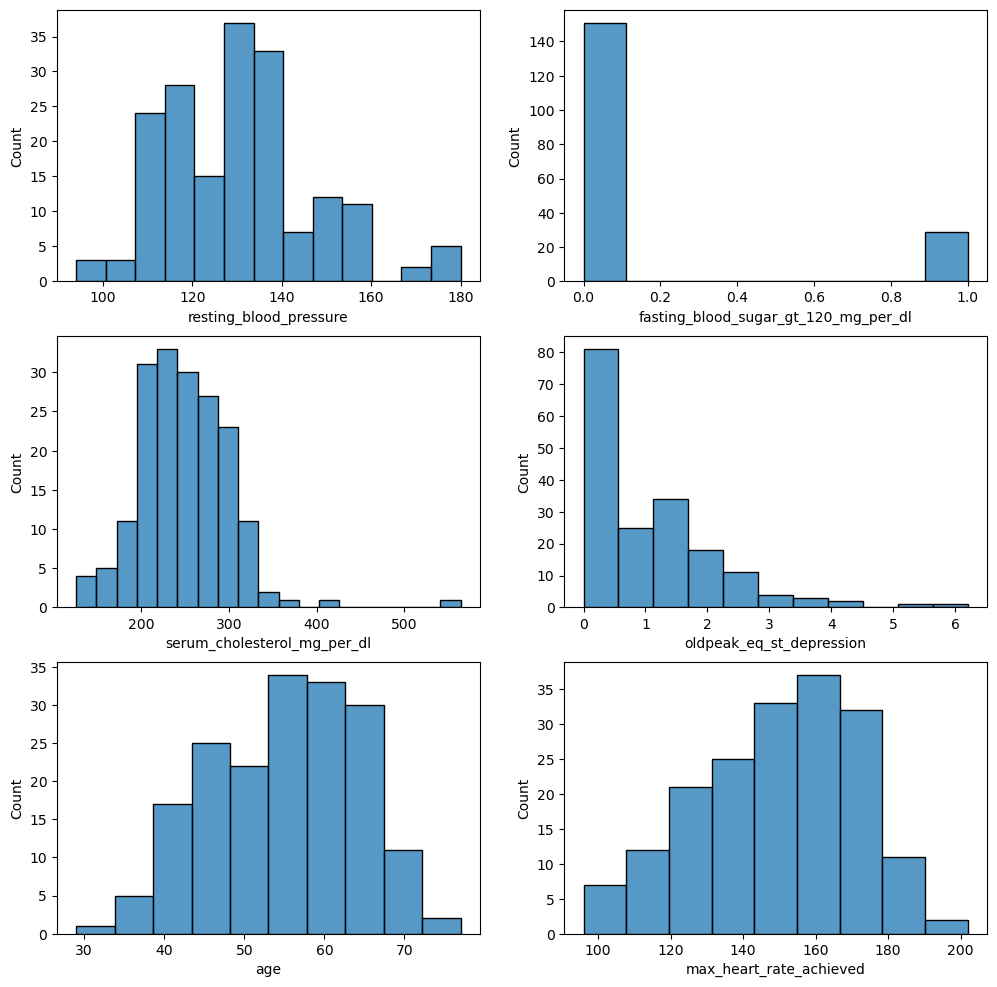

In [28]:
fig = plt.figure(figsize=(12,12))
plotnumber=1
for column in num_cols:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.histplot(x=column , data=data[[column]])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

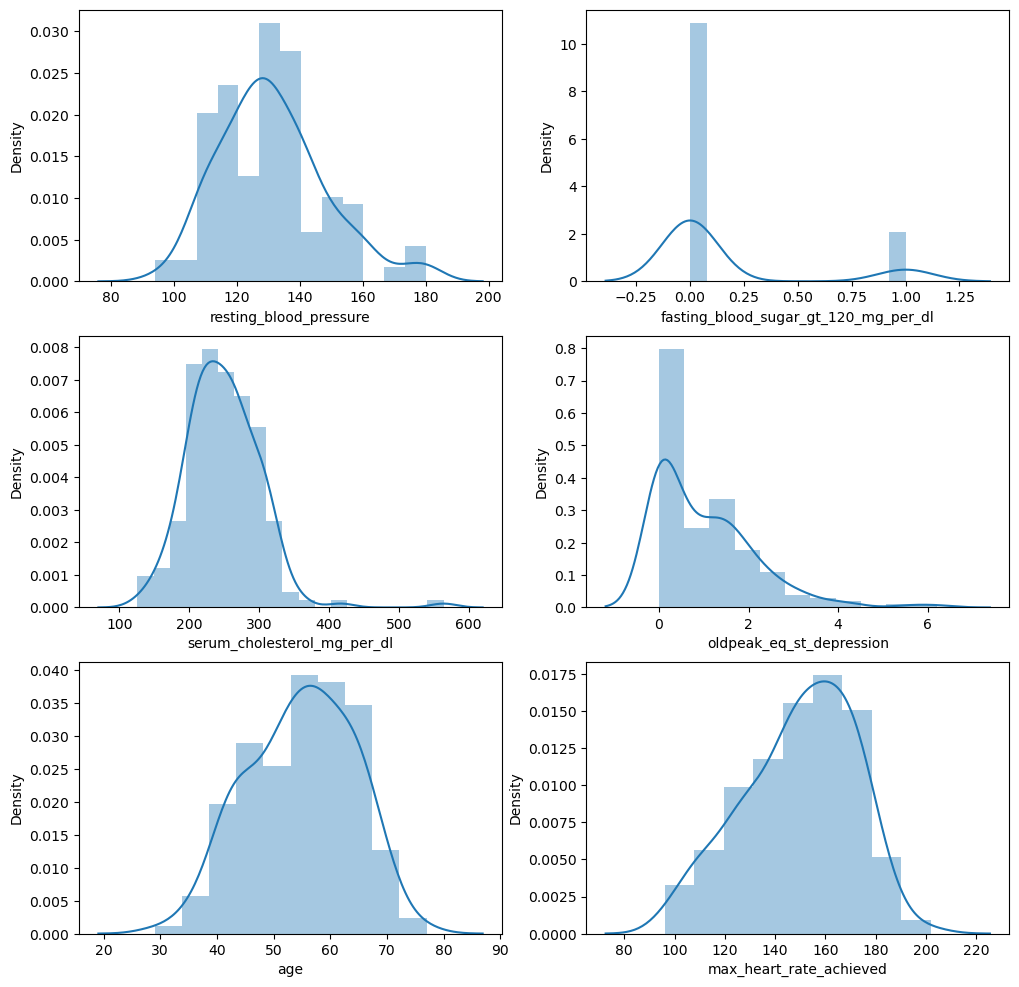

In [29]:
fig = plt.figure(figsize=(12,12))
plotnumber=1
for column in num_cols:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [30]:
## Visualization using count plot

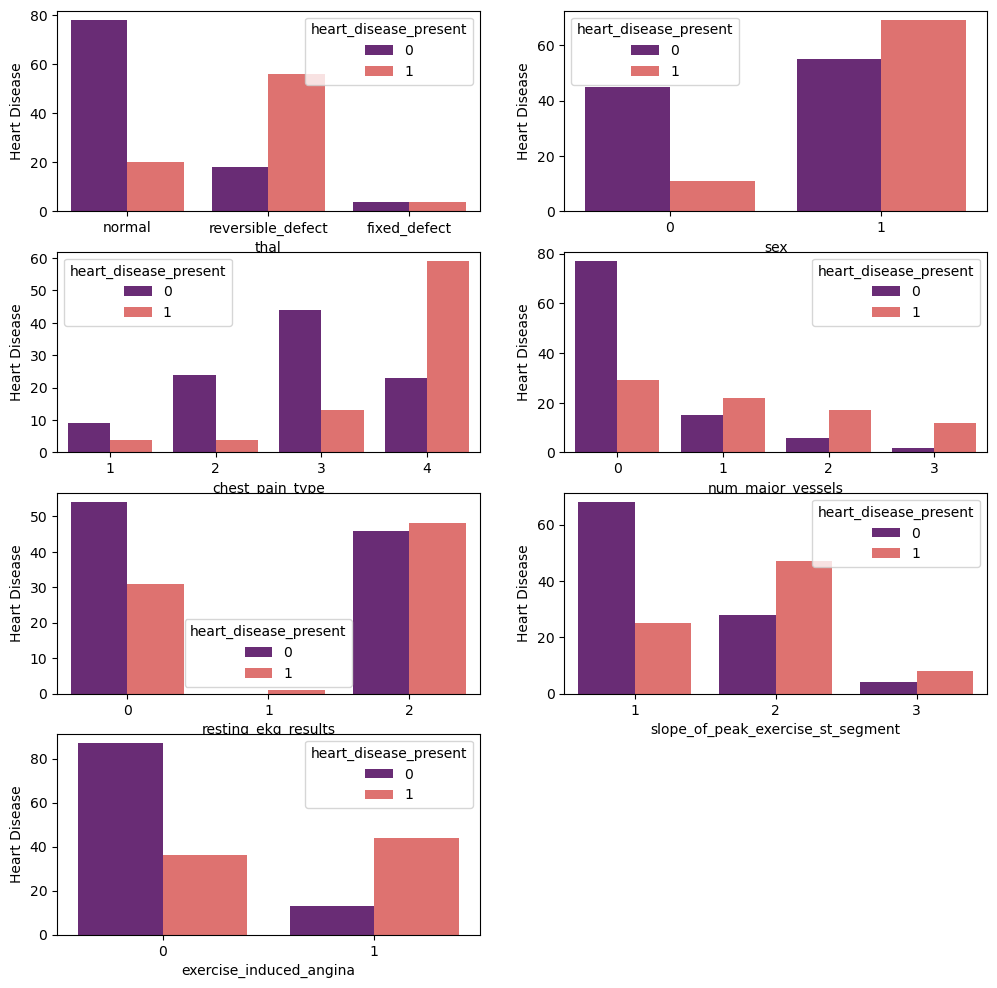

In [31]:
fig = plt.figure(figsize=(12,12))
plotnumber=1
for column in cat_cols:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=column , data = data[[column,'heart_disease_present']] , ax=ax , hue= data['heart_disease_present'],palette = "magma")
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Heart Disease',fontsize=10)
    plotnumber+=1
plt.show()

1) We notice that people whose thal is normal has very less chance of heart disease 

2) We notice that people with chest pain type 4 has the highest chances of heart diseases , and people with chest pain type 3 are less likely to have a heart attack

3) We observe that the patients who has the slope of 1 are less likely to have heart disease and those with slope='2' are more likely to have a heart disease

4) People who have 0 no of vessels are less likely to have a heart disease

## Checking for Outliers

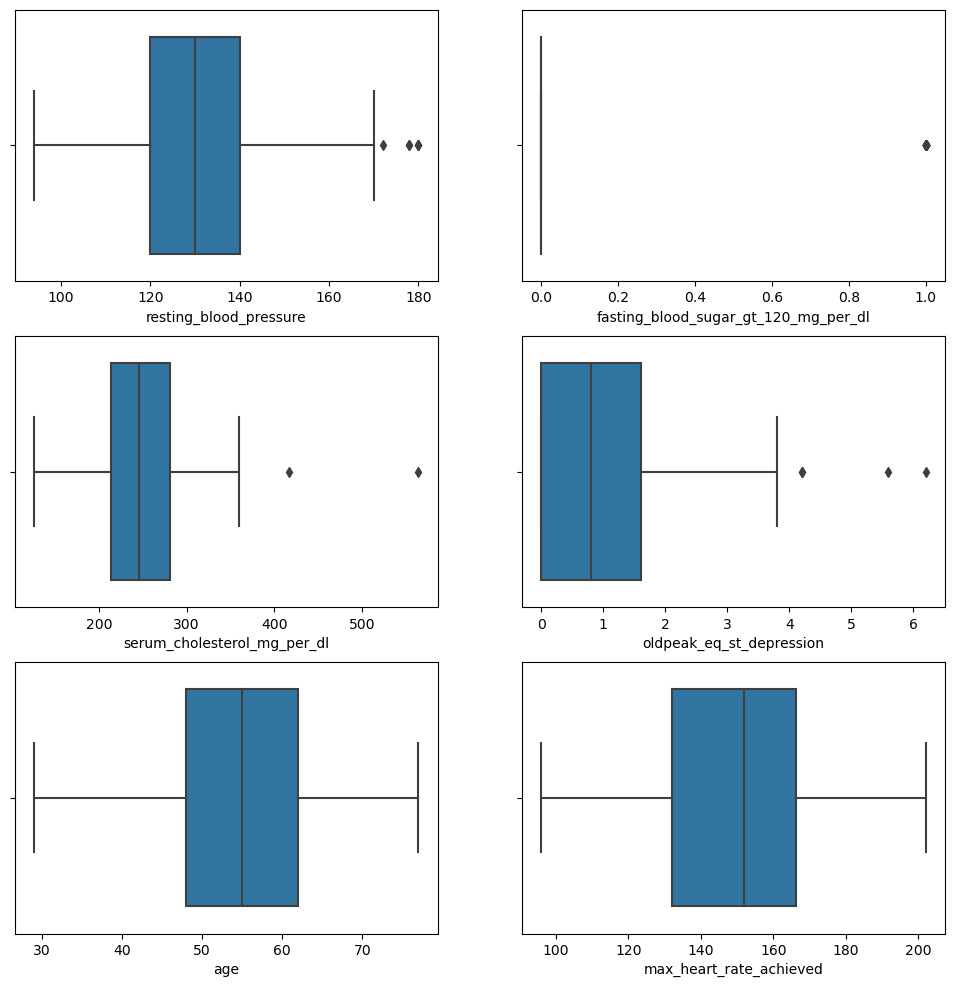

In [32]:
fig = plt.figure(figsize=(12,12))
plotnumber=1
for column in num_cols:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [33]:
## there are very few outliers and we need not handle them as there might be few extreme cases whose bp might be high and old peak st depression level might be high on few unique cases

## Correlation Matrix / HeatMap

<AxesSubplot:>

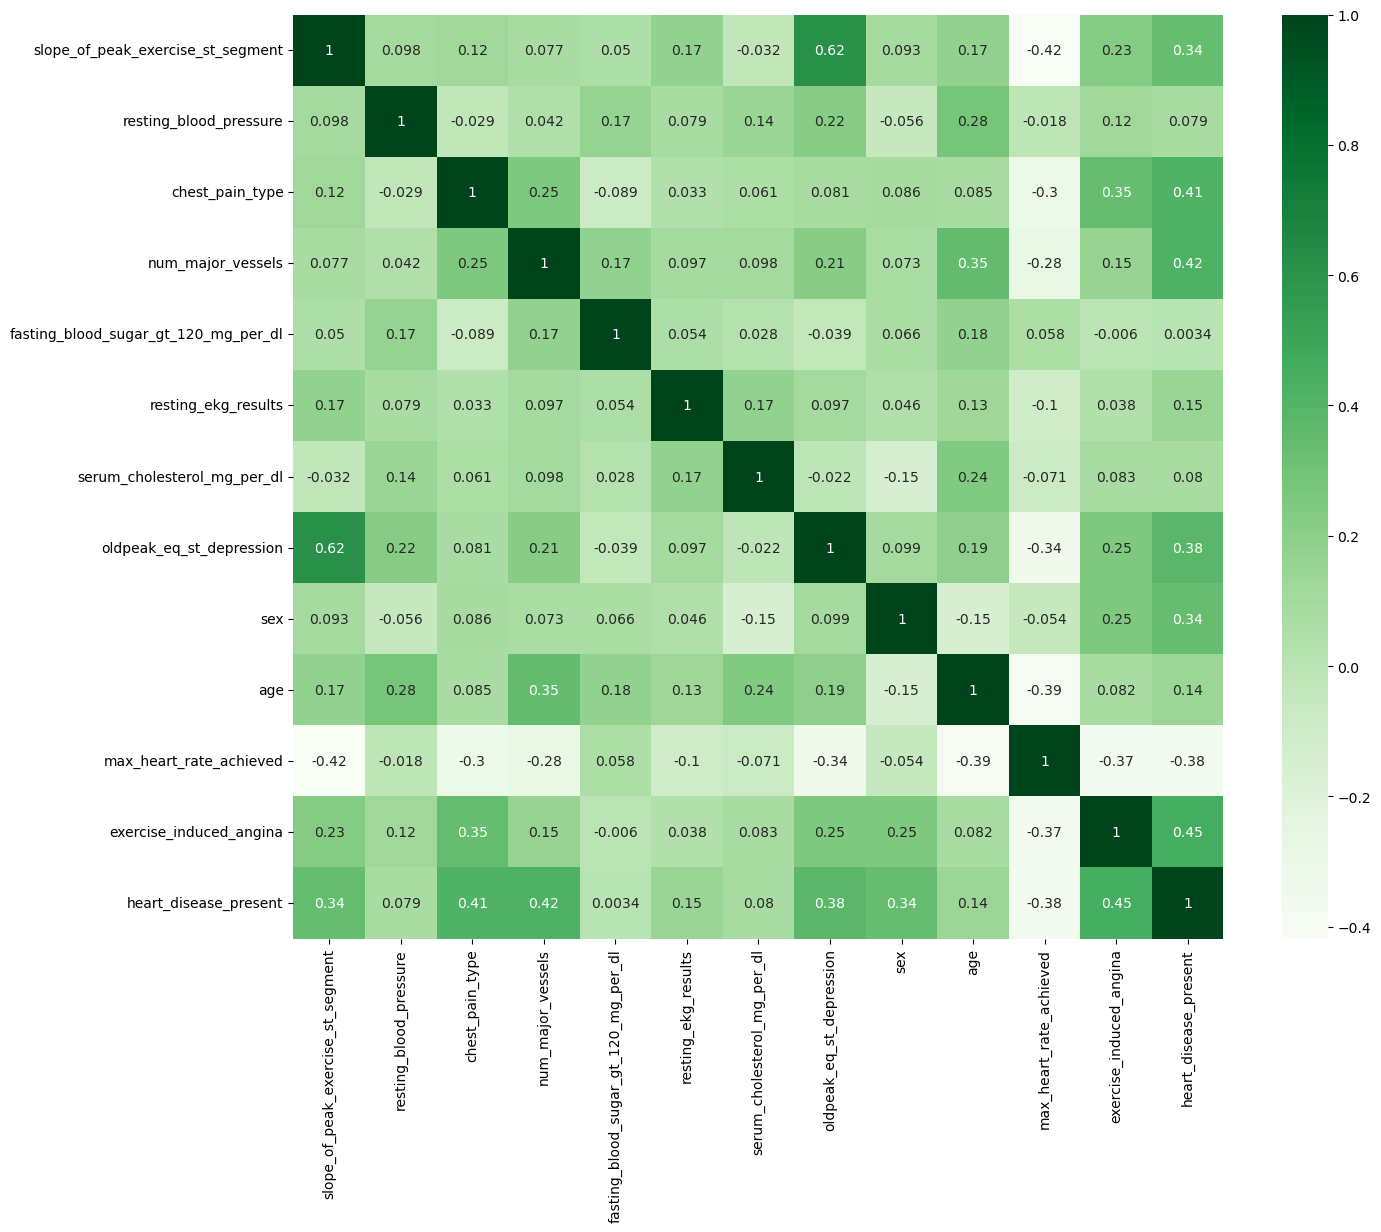

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True , cmap='Greens')

## Scaling data 

In [35]:
## Encoding of Categorical columns are required for machine to understand and intepret

In [36]:
#label Encoding for Thal 

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
labelencoder = LabelEncoder()

In [39]:
data['thal'] = labelencoder.fit_transform(data['thal'])

In [40]:
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [41]:
## Standard Scaling for the machine to view all the columns as equally as other columns

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler

StandardScaler()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = data.drop(columns='heart_disease_present')

In [47]:
y = data['heart_disease_present']

In [48]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [49]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [50]:
X_scaled = scaler.fit_transform(X.astype('float'))

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=4)

In [52]:
X_train

array([[ 0.72919727, -2.41176471, -0.31309742, ...,  0.44999378,
        -0.70371942, -0.68074565],
       [ 0.72919727, -0.64705882, -0.07729183, ..., -1.05396422,
         1.15973567, -0.68074565],
       [-0.89124111, -0.64705882,  0.27641655, ...,  0.34256821,
         0.11438281, -0.68074565],
       ...,
       [ 2.34963566, -0.64705882, -0.66680581, ...,  0.98712164,
        -2.43082415,  1.46897745],
       [-0.89124111, -0.64705882,  0.51222214, ..., -0.08713407,
         0.47798381, -0.68074565],
       [ 0.72919727, -2.41176471,  0.51222214, ...,  0.23514264,
        -0.06741768, -0.68074565]])

In [53]:
X_test

array([[-0.89124111, -0.64705882, -0.66680581, -0.16621968, -0.71840267,
        -0.4382385 , -1.05425489, -0.44151656, -0.90320689,  0.67202151,
        -1.16138979,  0.88703493, -0.68074565],
       [ 0.72919727,  1.11764706, -0.19519463,  0.90233541,  0.31609717,
        -0.4382385 , -1.05425489,  0.26228916, -0.72435404,  0.67202151,
         0.98712164, -2.02177303,  1.46897745],
       [ 0.72919727, -0.64705882, -1.84583375,  0.90233541,  1.35059702,
        -0.4382385 ,  0.95384966,  0.9470731 , -0.09836907,  0.67202151,
         1.30939835, -1.11277054,  1.46897745],
       [ 0.72919727, -0.64705882,  0.51222214, -1.23477477, -0.71840267,
        -0.4382385 ,  0.95384966,  0.85196422,  0.25933663, -1.48804762,
         0.12771707,  0.15983294, -0.68074565],
       [ 0.72919727,  1.11764706, -0.07729183,  0.90233541, -0.71840267,
        -0.4382385 , -1.05425489,  1.06120376,  0.16991021, -1.48804762,
        -0.40941079, -0.34011843,  1.46897745],
       [-0.89124111, -0.647058

In [54]:
y_train

74     1
16     0
19     1
2      1
132    0
      ..
87     1
104    0
129    1
174    0
122    0
Name: heart_disease_present, Length: 144, dtype: int64

In [55]:
y_test

158    0
110    0
91     1
101    0
61     1
99     0
142    0
45     1
14     1
1      0
76     0
165    0
18     0
47     0
153    1
167    1
84     0
26     0
127    0
169    0
88     0
92     0
172    1
116    0
125    0
6      1
145    0
135    0
93     1
141    0
33     0
82     1
48     1
12     1
168    0
143    1
Name: heart_disease_present, dtype: int64

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 13)
(144,)
(36, 13)
(36,)


In [57]:
## We can analyze that the target has just 2 values [0,1] , hence we can say that this is a classification algorithm 

## Model Preperation 

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [59]:
knn=KNeighborsClassifier(n_neighbors=9, weights='uniform')

In [60]:
knn

KNeighborsClassifier(n_neighbors=9)

In [61]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors o

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [63]:
y_pred_knn = knn.predict(X_test)

In [64]:
y_pred_knn

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [65]:
y_test

158    0
110    0
91     1
101    0
61     1
99     0
142    0
45     1
14     1
1      0
76     0
165    0
18     0
47     0
153    1
167    1
84     0
26     0
127    0
169    0
88     0
92     0
172    1
116    0
125    0
6      1
145    0
135    0
93     1
141    0
33     0
82     1
48     1
12     1
168    0
143    1
Name: heart_disease_present, dtype: int64

In [66]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))

The accuracy score is :  0.8055555555555556


In [67]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.75      0.69      0.72        13

    accuracy                           0.81        36
   macro avg       0.79      0.78      0.79        36
weighted avg       0.80      0.81      0.80        36



In [68]:
## The accuracy score achieved is 77% , we can try to increase the accuracy , by equallying the number of samples . i.e by using SMOTE 

#### SMOTE

In [69]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [70]:
## Not using SMOTE for testing data.Because the data may or may not be balanced one.

In [71]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [72]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 77, 1: 67})
SMOTE Classes Counter({1: 77, 0: 77})


In [73]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=9)

In [74]:
y_pred_knn = knn2.predict(X_test)

In [75]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))

The accuracy score is :  0.8055555555555556


In [76]:
## SMOTE works fairly on large data set , here the accuracy score made no difference . Due to overfitting

In [77]:
results=[]
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    results.append((k,accuracy))
    
result_df = pd.DataFrame(results,columns=['k','accuracy'])
print(result_df)

    k  accuracy
0   1  0.722222
1   2  0.777778
2   3  0.777778
3   4  0.777778
4   5  0.777778
5   6  0.777778
6   7  0.777778
7   8  0.805556
8   9  0.805556
9  10  0.750000


In [78]:
# We can observe that , when the value of k is 8,9 then the accuracy is the highest 

## Logistic Regression

In [79]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(X_train,y_train)#training model with training data

LogisticRegression()

In [80]:
y_predLR = log_reg.predict(X_test)

In [81]:
y_predLR

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [82]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_predLR))

The accuracy score is :  0.8055555555555556


In [83]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.88      0.54      0.67        13

    accuracy                           0.81        36
   macro avg       0.83      0.75      0.76        36
weighted avg       0.82      0.81      0.79        36



## Support Vector Machine (SVM)

In [84]:
from sklearn.svm import SVC
svclassifier = SVC()

In [85]:
svclassifier

SVC()

In [86]:
svclassifier.fit(X_train,y_train)

SVC()

In [87]:
y_predSVM=svclassifier.predict(X_test)

In [88]:
y_predSVM

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [89]:
print("The accuracy score is of SVM : ", accuracy_score(y_test,y_predSVM))

The accuracy score is of SVM :  0.7777777777777778


In [94]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.73      0.62      0.67        13

    accuracy                           0.78        36
   macro avg       0.76      0.74      0.75        36
weighted avg       0.77      0.78      0.77        36



##### Hyperparameter Tuning for SVM

In [147]:
# Logistic Regression
parameters =   {
        'C': np.logspace(-4, 4, 20),
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 9))
    }
print("The parameters are :" , parameters)
clf = RandomizedSearchCV(svclassifier,parameters,random_state=0)
search=clf.fit(X_train,y_train)
print("The best parameters are - ", search.best_params_)
svclassifier2 = SVC(kernel= 'linear', gamma= 'scale', degree = 5, C = 10000.0)
svclassifier2.fit(X_train,y_train)
y_pred_svc2 = svclassifier2.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_svc2)
print("Accuracy = ",accuracy)

The parameters are : {'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
The best parameters are -  {'kernel': 'linear', 'gamma': 'scale', 'degree': 5, 'C': 10000.0}
Accuracy =  0.8055555555555556


## Bagging

In [96]:
from sklearn.ensemble import BaggingClassifier

In [97]:
estimator_range=[2,4,6,8,10,12,14,16,18,20]

In [98]:
models = []
scores = []
for n_estimator in estimator_range:
    bagging = BaggingClassifier(n_estimators=n_estimator , random_state=22)
    bagging.fit(X_train , y_train)
    y_pred = bagging.predict(X_test)
    models.append(bagging)
    scores.append(accuracy_score(y_test,y_pred))
print("Models : ", models)
print("Scores : ",scores)

Models :  [BaggingClassifier(n_estimators=2, random_state=22), BaggingClassifier(n_estimators=4, random_state=22), BaggingClassifier(n_estimators=6, random_state=22), BaggingClassifier(n_estimators=8, random_state=22), BaggingClassifier(random_state=22), BaggingClassifier(n_estimators=12, random_state=22), BaggingClassifier(n_estimators=14, random_state=22), BaggingClassifier(n_estimators=16, random_state=22), BaggingClassifier(n_estimators=18, random_state=22), BaggingClassifier(n_estimators=20, random_state=22)]
Scores :  [0.7777777777777778, 0.7222222222222222, 0.6944444444444444, 0.7222222222222222, 0.7777777777777778, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.75]


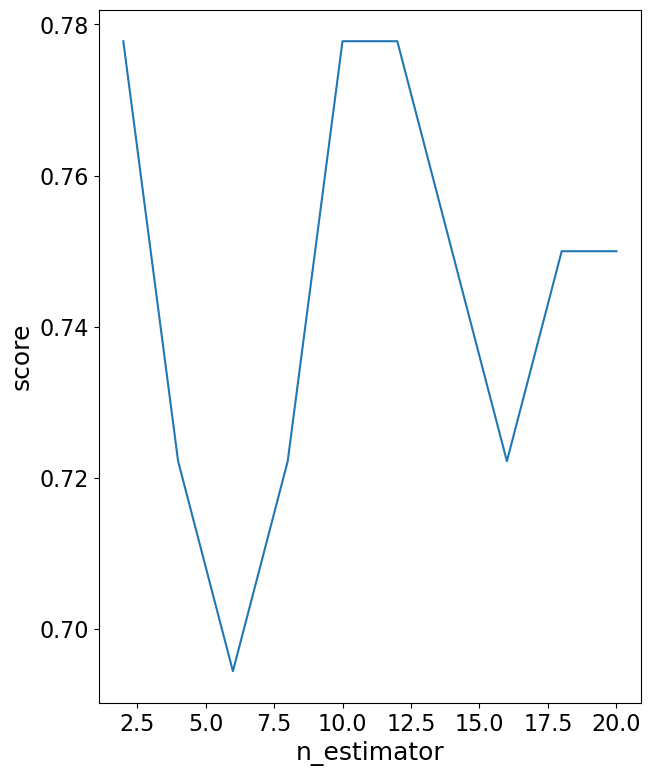

In [99]:
plt.figure(figsize=(7,9))
plt.plot(estimator_range,scores)

plt.xlabel("n_estimator", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()


## Bagging using base estimator as Linear Regression Model

In [100]:
bgclassifier = BaggingClassifier(base_estimator=log_reg, n_estimators=100,max_features=10,max_samples=100,random_state=1, n_jobs=5)
bgclassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=10,
                  max_samples=100, n_estimators=100, n_jobs=5, random_state=1)

In [101]:
y_pred_bag = bgclassifier.predict(X_test)

In [102]:
accuracy=accuracy_score(y_test,y_pred_bag)
accuracy

0.8333333333333334

## Boosting 

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gbc = GradientBoostingClassifier()

In [105]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [106]:
y_pred_gbc = gbc.predict(X_test)

In [107]:
y_pred_gbc

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [108]:
accuracy = accuracy_score(y_test,y_pred_gbc)

In [109]:
accuracy

0.7777777777777778

In [110]:
## xg boost

In [111]:
import xgboost

In [112]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(X_train,y_train)
y_pred_xgb=xgb_r.predict(X_test)

In [113]:
y_pred_xgb

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [114]:
accuracy = accuracy_score(y_pred_xgb,y_test)

In [115]:
accuracy

0.7777777777777778

In [116]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.69      0.69      0.69        13

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



#### Hyperparameter Tuning using XGBoost

In [117]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0})


In [118]:
XGB2=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators=115, max_depth=12, learning_rate=0.2, gamma=0)
XGB2.fit(X_train, y_train)#training 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=115, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [119]:
y_pred_xgb2=XGB2.predict(X_test)


In [120]:
f1_score=f1_score(y_pred_xgb2,y_test)

In [121]:
f1_score

0.6923076923076923

In [122]:
print(classification_report(y_pred_xgb2,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.69      0.69      0.69        13

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



In [123]:
accuracy = accuracy_score(y_pred_xgb2,y_test)

In [124]:
accuracy

0.7777777777777778

In [125]:
## The accuracy has not improved after hyper-parameter tuning as well

## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [127]:
y_pred_rf=rf_clf.predict(X_test)#testing

In [128]:

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.80      0.62      0.70        13

    accuracy                           0.81        36
   macro avg       0.80      0.76      0.78        36
weighted avg       0.80      0.81      0.80        36



In [129]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = accuracy_score(y_test,Y_pred_rf)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

0.8611111111111112
19


In [130]:
accuracy = accuracy_score(y_test,Y_pred_rf)

In [131]:
accuracy

0.8611111111111112

## Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
nb = GaussianNB()

In [134]:
nb.fit(X_train,y_train)

GaussianNB()

In [135]:
y_pred_nb = nb.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test,y_pred_nb)
accuracy

0.8055555555555556

## Analysing the best fit moel

In [137]:
print("KNN score : ")
print("-------------------------------------")
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))
print('Classification report of KNN :')
print(classification_report(y_test,y_pred_knn))
print('\n')
print("Naive Bayes score : ")
print("-------------------------------------")
print("The accuracy score is : ", accuracy_score(y_test,y_pred_nb))
print('Classification report of KNN :')
print(classification_report(y_test,y_pred_nb))
print('\n')
print("Random Forest score : ")
print("-------------------------------------")
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))
print('Classification report of Random Forest :')
print(classification_report(y_test,Y_pred_rf))
print('\n')
print("Boosting  score : ")
print("-------------------------------------")
print("The accuracy score of XGBoosting : ", accuracy_score(y_test,y_pred_xgb2))
print('Classification report of Random Forest :')
print(classification_report(y_test,y_pred_xgb2))
print('\n')
print("Bagging  score : ")
print("-------------------------------------")
print("The accuracy score of Bagging : ", accuracy_score(y_test,y_pred_bag))
print('Classification report of Bagging :')
print(classification_report(y_test,y_pred_bag))
print('\n')
print("Support Vector Machine score : ")
print("-------------------------------------")
print("The accuracy score of SVM : ", accuracy_score(y_test,y_predSVM))
print('Classification report of SVM :')
print(classification_report(y_test,y_predSVM))
print('\n')
print("LogisticRegression  score : ")
print("-------------------------------------")
print("The accuracy score of LogisticRegression : ", accuracy_score(y_test,y_predLR))
print('Classification report of LogisticRegression :')
print(classification_report(y_test,y_predLR))
print('\n')


KNN score : 
-------------------------------------
The accuracy score is :  0.8055555555555556
Classification report of KNN :
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.75      0.69      0.72        13

    accuracy                           0.81        36
   macro avg       0.79      0.78      0.79        36
weighted avg       0.80      0.81      0.80        36



Naive Bayes score : 
-------------------------------------
The accuracy score is :  0.8055555555555556
Classification report of KNN :
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.88      0.54      0.67        13

    accuracy                           0.81        36
   macro avg       0.83      0.75      0.76        36
weighted avg       0.82      0.81      0.79        36



Random Forest score : 
-------------------------------------
The accuracy score is

# Conclusion 

When we compare the accuracy score all the  models, the Bagging model has the highest accuracy of 83% followed by Logistic Regression has the decond highest accuracy of 80.05% . Bagging is achieving good accuracy using Logistic Regression as its base model . So, finally baggingt model is the best model for classifying and predicting the heart disease in a patient.